<a href="https://colab.research.google.com/github/YogeshMaan/MAE598-Design-Optimization/blob/main/HW5_P1_DesignOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [15]:
w_a1 = 8.07131
w_a2 = 1730.63
w_a3 = 233.426
d_a1 = 7.43155
d_a2 = 1554.679
d_a3 = 240.337
T = 20

p1_sat = 10**(w_a1 - (w_a2/(T+w_a3)))
p2_sat = 10**(d_a1 - (d_a2/(T+d_a3)))

x_1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
x_2 = np.array([(1 - x_1)])
p_measured = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])





In [16]:
def objective_function(params, x_1, x_2, p_measured):
  A12, A21 = params

  p_pred = x_1 * np.exp(A12 * (A21 * x_2 / (A12 * x_1 + A21 * x_2))**2) * p1_sat + x_2 * np.exp(A21 * (A12 * x_1 / (A12 * x_1 + A21 * x_2))**2) * p2_sat

  return np.sum((p_pred - p_measured)**2)



A12, A21: [1.95841969 1.68918498]
Final Loss = 0.6701940011997198


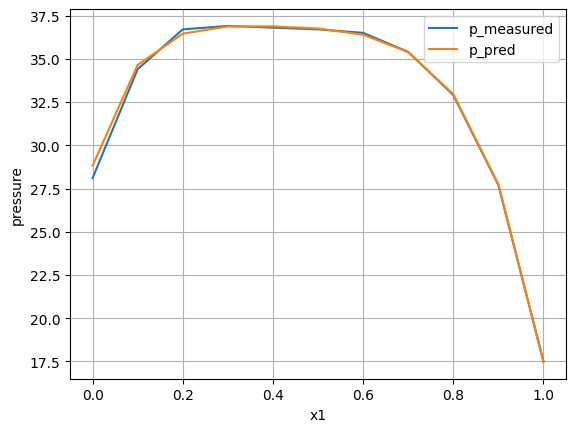

In [17]:

# initializing variables
initial_val = [1.0, 1.0]

# Minimize the objective function using gradient descent
result = minimize(objective_function, initial_val, args=(x_1, x_2, p_measured), method='CG')

# Get the optimized parameters
optimized_params = result.x

# Print the optimized parameters and loss
print("A12, A21:", optimized_params)
print("Final Loss =", result.fun)

A12 = optimized_params[0]
A21 = optimized_params[1]


p_pred = x_1 * np.exp(A12 * (A21 * x_2 / (A12 * x_1 + A21 * x_2))**2) * p1_sat + \
           x_2 * np.exp(A21 * (A12 * x_1 / (A12 * x_1 + A21 * x_2))**2) * p2_sat



plt.plot(np.squeeze(x_1), np.squeeze(p_measured), label='p_measured')
plt.plot(np.squeeze(x_1), np.squeeze(p_pred), label='p_pred')
plt.xlabel('x1')
plt.ylabel('pressure')

plt.grid()
plt.legend()
plt.show()